In [10]:
__author__ = 'Security'
import numpy as np
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
from multiprocessing.dummy import Pool

In [3]:
N = 10000
sample = stats.norm.rvs(size=N)

In [4]:
def F(n, x):
    sampleSlice = sample[:n+1]
    return 1/float(n) * len(list(filter((lambda s: s < x), sampleSlice)))

def Freal(x):
    return 0.5 + np.math.erf(x/(np.math.sqrt(2))) / 2

def drawPlotFor(n):
    presentationRange = np.arange(-10, 10, 0.1)
    plt.plot(presentationRange, [F(n, x) for x in presentationRange])
    plt.plot(presentationRange, [Freal(x) for x in presentationRange])
    plt.plot(sample[:n+1], np.zeros(n+1), 'ro', alpha=0.2)
    plt.show()

def drawPlots(ns):
    for n in ns:
        drawPlotFor(n)

In [5]:
ns = [10, 25, 50, 100, 1000, 5000, N-1]
n = [N]

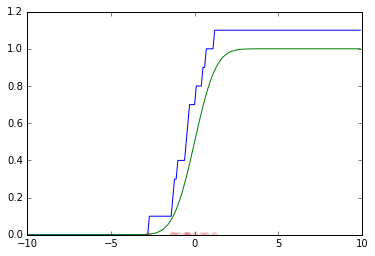

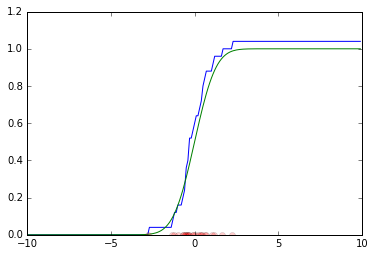

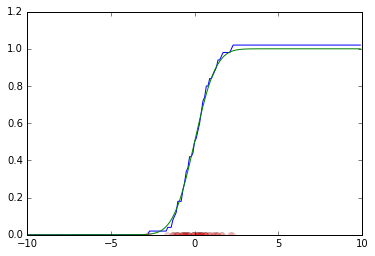

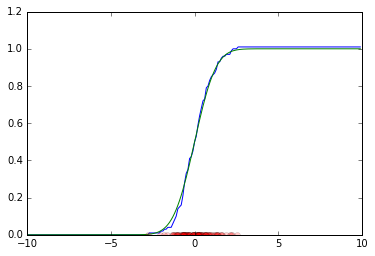

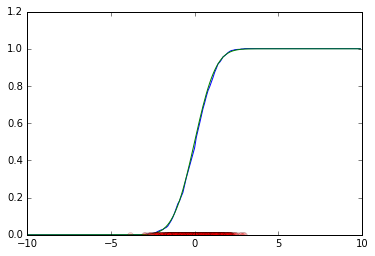

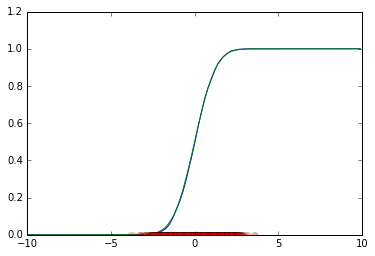

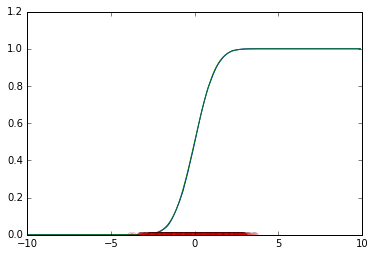

In [6]:
drawPlots(ns)

In [8]:
def D(n):
    presentationRange = np.arange(-10, 10, 0.1)
    return np.max(np.abs(np.array([F(n, x) for x in presentationRange]) - np.array([Freal(x) for x in presentationRange])))

In [11]:
maxSize = 10000
parts = 100
ds =[[0.0] for _ in range(parts)]

def calculateDs(i):
    ds[i] = [D(n) for n in range(int((maxSize * i) / parts), int((maxSize * (i+1)) / parts))]
pool = Pool(4)
pool.map(calculateDs, range(1, parts))
data = []
for i in range(1, parts):
    for d in ds[i]:
        data.append(d)

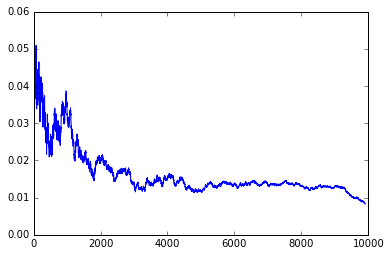

In [12]:
plt.plot(data)
plt.show()